In [1]:
words = open("names.txt", 'r').read().splitlines()

In [4]:
min([len(word) for word in words])

2

# Bigram Language Model
- Takes into account only 2 characters. 

In [12]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [46]:
stoi = {j:i+1 for i, j in enumerate(sorted(set(''.join(words))))}

stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [47]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [48]:
import torch


b = {}
N = torch.zeros((27, 27), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] += 1


(-0.5, 26.5, 26.5, -0.5)

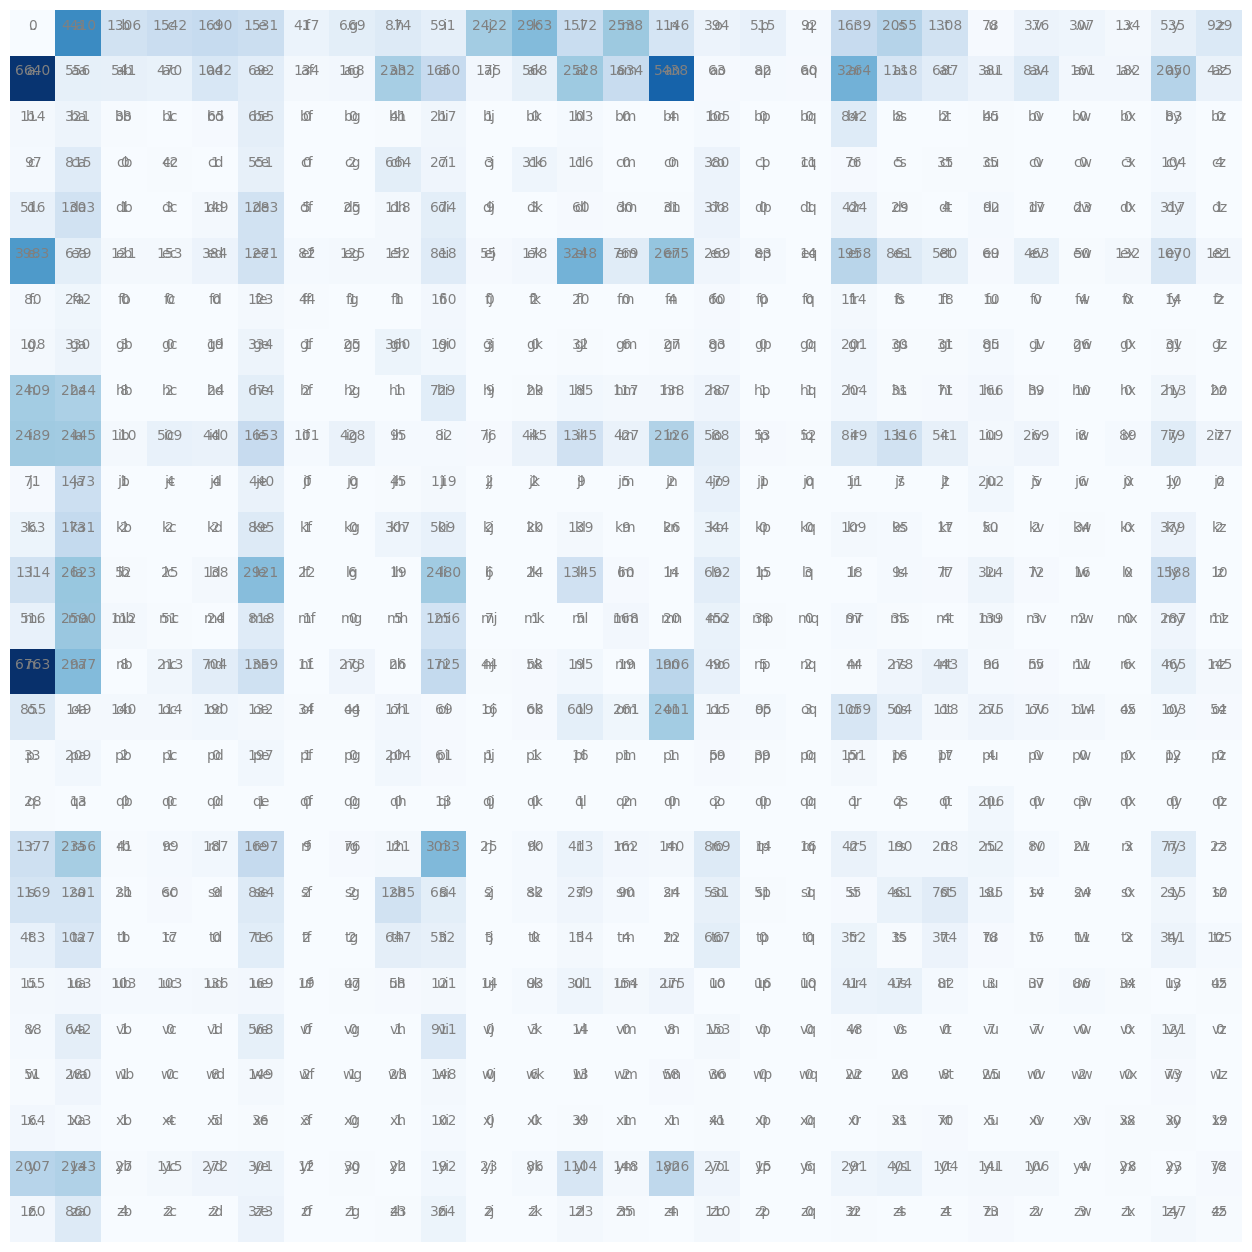

In [49]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="bottom", color="gray")
    
plt.axis("off")

In [51]:
p = N[0, :].float()

In [52]:
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [53]:
# Probability Normalization

p = p / sum(p)

p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [60]:
g = torch.Generator().manual_seed(2147483647)

ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

itos[ix]

'j'

In [95]:
P = N+1.float()

# This summs up the matrix along axis = 1 (Horizontally)
# Keepdim maintains the dimension of the array i.e 2D
# keepdim=False will turn it into a 1D Array
# P = P / P.sum(1, keepdim=True)

# Below is more efficient than the above as it does not create extra memory. 
P /= P.sum(1, keepdim=True) 

SyntaxError: invalid decimal literal (4225429885.py, line 1)

In [96]:
for i in range(10):
    ix = 0

    outs = []
    while True:
        p = N[ix].float()

        p = p / p.sum()

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

        outs.append(itos[ix])

        if ix == 0:
            break

    print(''.join(outs))

anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.


# Exercise:
Can you divide a 27, 27 array by 27, 1 array

Whether you can do it or not is defined by broadcasting rules. 

Following are the rules if 2 indices can be divided. 
1. Each tensor has at least 1 dimension
2. When you align the one below the other, and iterate through the right. It is acceptable if both are equal, one of them is 1 or 1 of then does not exist.  

Eg. 27 27
    27 1

How does it divide (27, 27) vector with (27, 1) vector
- It takes the (27, 1) vector and stretches it. That means it copies the first column 27 times accross the remaining 26 columns and then does elementwise division. 

In [97]:
P[0].sum()

tensor(1.)

## Evaluating the quality of the model
=

In [103]:
log_likelihood = 0.0

# Some people like to take an average instead of just the sum
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob  = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {log_prob:.4f}")

log_likelihood /= n
print(f"{log_likelihood}")    
negative_log_likelihood = -log_likelihood
print(f"Negative Log Likelihood: {negative_log_likelihood}")

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
-2.424102306365967
Negative Log Likelihood: 2.424102306365967


1. What are we trying to achieve here?
- So here we got the likelihood of each bigram, now the problem with this is these are very small numbers to deal with and multiplying them with each other will result into an even small number. 

2. So what do we do now?
- To solve this we use something called log likelihood, this helps us to deal with smaller numbers. 

3. What does log likelihood do?
- Log likelihood simply takes the log of numbers and plots it. We then take negative of that so our goal is to optimise it so the log likelihood is 0. 

In the above example we got a negative averaged log likelihood to be 2.42...

Our goal is to minimise it beacuse lower the number better. 

We want to maximise the likelihood which means maximising the log likelihood 
This inversely means minimising the negative log likelihood

In [106]:
# Create the training set of all bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [109]:
import torch.nn.functional as F

x_enc = F.one_hot(xs, num_classes=27).float()
x_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [116]:
W = torch.randn((27, 27))

logits = x_enc @ W

counts = logits.exp()

prob = counts / counts.sum(1, keepdim=True)

prob

tensor([[0.0383, 0.0197, 0.1221, 0.0078, 0.0224, 0.0315, 0.0430, 0.0240, 0.0241,
         0.0179, 0.0609, 0.0342, 0.1098, 0.0155, 0.0285, 0.0091, 0.0115, 0.0686,
         0.0331, 0.0067, 0.0541, 0.0083, 0.0744, 0.0364, 0.0200, 0.0382, 0.0400],
        [0.0478, 0.0156, 0.0216, 0.0973, 0.0210, 0.0217, 0.0052, 0.0127, 0.0268,
         0.0107, 0.0230, 0.0134, 0.0754, 0.0513, 0.1458, 0.0102, 0.0089, 0.0262,
         0.0401, 0.0151, 0.0655, 0.0505, 0.0032, 0.0128, 0.0225, 0.1474, 0.0084],
        [0.0398, 0.0692, 0.0124, 0.0106, 0.0044, 0.0258, 0.0176, 0.0156, 0.0267,
         0.0174, 0.0865, 0.0243, 0.0407, 0.0247, 0.0035, 0.0262, 0.0304, 0.0511,
         0.0571, 0.0994, 0.0169, 0.0441, 0.0029, 0.0521, 0.0927, 0.0607, 0.0474],
        [0.0398, 0.0692, 0.0124, 0.0106, 0.0044, 0.0258, 0.0176, 0.0156, 0.0267,
         0.0174, 0.0865, 0.0243, 0.0407, 0.0247, 0.0035, 0.0262, 0.0304, 0.0511,
         0.0571, 0.0994, 0.0169, 0.0441, 0.0029, 0.0521, 0.0927, 0.0607, 0.0474],
        [0.0752, 0.1426,

In [120]:
xs

tensor([ 0,  5, 13, 13,  1])

In [121]:
ys

tensor([ 5, 13, 13,  1,  0])

In [122]:
# Randomly initialise 27 neurons weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [127]:
# Forward pass
xenc = F.one_hot(xs, num_classes=27).float()

logits = xenc @ W
counts = logits.exp()

probs = counts / counts.sum(1, keepdim=True)

loss = -probs[torch.arange(5), ys].log().mean()

loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [131]:
# Backward pass
W.grad = None

loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [130]:
W.data += 0.1 * W.grad

In [132]:
print(loss)

tensor(3.7693, grad_fn=<NegBackward0>)
